In [1]:
#Lab | Revisiting Machine Learning Case Study
#In this lab, you will use learningSet.csv file which you already have cloned in today's activities.

#Instructions

#Complete the following steps on the categorical columns in the dataset:

#1. Check for null values in all the columns

#2. Exclude the following variables by looking at the definitions. 
    #Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

    #OSOURCE - symbol definitions not provided, too many categories
    #ZIP CODE - we are including state already
    
#3. Identify columns that over 85% missing values

#4. Remove those columns from the dataframe

#5. Reduce the number of categories in the column GENDER. 
    #The column should only have either "M" for males, "F" for females, and "other" for all the rest.

    #Note that there are a few null values in the column. We will first replace those null values using the code below:
    
    #print(categorical['GENDER'].value_counts())
    #categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r'C:\Users\TOSHIBA\Downloads\Ironhack\Activities\learningSet.txt')
data.columns=[c.lower().replace(' ', '_') for c in data.columns]
data.head()

,odatedw,osource,tcode,state,zip,mailcode,pvastate,dob,noexch,recinhse,...,target_d,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [4]:
data_cat=data.select_dtypes(include=["object"])
data_cat

,osource,state,zip,mailcode,pvastate,noexch,recinhse,recp3,recpgvg,recsweep,...,rfa_21,rfa_22,rfa_23,rfa_24,rfa_2r,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,geocode2
0,GRI,IL,61081,,,0,,,,,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,...,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,...,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,...,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,AK,99504,,,0,,,,,...,,,,,L,G,X,X,X,C
95408,DCD,TX,77379,,,0,,,,,...,,,,,L,F,X,X,X,A
95409,MBC,MI,48910,,,0,,X,,,...,P1D,P1D,,,L,E,X,X,X,B
95410,PRV,CA,91320,,,0,X,,,,...,A1F,A1F,S2F,S3F,L,F,X,X,X,A


### 1. Check for null values in all the columns

In [5]:
#Buscamos reemplazar los nulos que estan 'disfrazados' con espacios vacios
data_cat.replace(' ', np.nan, inplace=True)

In [6]:
data_cat.isnull().sum()

osource       928
state           0
zip             0
mailcode    94013
pvastate    93954
            ...  
rfa_2a          0
mdmaud_r        0
mdmaud_f        0
mdmaud_a        0
geocode2      319
Length: 74, dtype: int64

In [7]:
nulls_percent_df=pd.DataFrame(data_cat.isnull().sum()/len(data_cat)*100).reset_index()
nulls_percent_df.columns=['column_name','null_percentage']
nulls_percent_df

,column_name,null_percentage
0,osource,0.972624
1,state,0.000000
2,zip,0.000000
3,mailcode,98.533727
4,pvastate,98.471890
...,...,...
69,rfa_2a,0.000000
70,mdmaud_r,0.000000
71,mdmaud_f,0.000000
72,mdmaud_a,0.000000


In [8]:
data_cat.isnull().sum()

osource       928
state           0
zip             0
mailcode    94013
pvastate    93954
            ...  
rfa_2a          0
mdmaud_r        0
mdmaud_f        0
mdmaud_a        0
geocode2      319
Length: 74, dtype: int64

In [9]:
data_cat['geocode2'].replace(' ', np.nan, inplace=True)
data_cat['geocode2'].isnull().sum()

319

In [10]:
data_cat['geocode2']=data_cat['geocode2'].fillna('A')
data_cat['geocode2']

0        C
1        A
2        C
3        C
4        A
        ..
95407    C
95408    A
95409    B
95410    A
95411    C
Name: geocode2, Length: 95412, dtype: object

In [11]:
data_cat['geocode2'].isnull().sum()

0

### 2. Exclude the following variables by looking at the definitions. 
    #Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

    #OSOURCE - symbol definitions not provided, too many categories
    #ZIP CODE - we are including state already
    

In [12]:
drop_list=['osource', 'zip']
drop_list

['osource', 'zip']

### 3. Identify columns that over 85% missing values

In [13]:
columns_above_threshold=nulls_percent_df[nulls_percent_df['null_percentage']>85]
print(len(columns_above_threshold))
columns_above_threshold

30


,column_name,null_percentage
3,mailcode,98.533727
4,pvastate,98.471890
6,recinhse,92.974678
7,recp3,97.886010
8,recpgvg,99.880518
9,recsweep,98.305245
15,child03,98.798893
16,child07,98.358697
17,child12,98.101916
18,child18,97.016099


### 4. Remove those columns from the dataframe

In [14]:
removed_columns_lst=['mailcode','pvastate','recinhse','recp3','recpgvg','recsweep','child03','child07','child12','child18','solp3',
                     'solih','major','collect1','veterans','bible','catlg','homee','cdplay','stereo','pcowners','photo','crafts',
                     'fisher','gardenin','boats','walker','kidstuff','cards','plates']
removed_columns_lst2=removed_columns_lst+drop_list
removed_columns_lst2

['mailcode',
 'pvastate',
 'recinhse',
 'recp3',
 'recpgvg',
 'recsweep',
 'child03',
 'child07',
 'child12',
 'child18',
 'solp3',
 'solih',
 'major',
 'collect1',
 'veterans',
 'bible',
 'catlg',
 'homee',
 'cdplay',
 'stereo',
 'pcowners',
 'photo',
 'crafts',
 'fisher',
 'gardenin',
 'boats',
 'walker',
 'kidstuff',
 'cards',
 'plates',
 'osource',
 'zip']

In [15]:
data_cat=data_cat.drop(removed_columns_lst2, axis=1)
data_cat

,state,noexch,mdmaud,domain,cluster,ageflag,homeownr,gender,datasrce,geocode,...,rfa_21,rfa_22,rfa_23,rfa_24,rfa_2r,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,geocode2
0,IL,0,XXXX,T2,36,NaN,NaN,F,NaN,NaN,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,CA,0,XXXX,S1,14,E,H,M,3,2,...,N1E,N1E,NaN,F1E,L,G,X,X,X,A
2,NC,0,XXXX,R2,43,NaN,U,M,3,NaN,...,NaN,S4D,S4D,S3D,L,E,X,X,X,C
3,CA,0,XXXX,R2,44,E,U,F,3,NaN,...,A1D,A1D,NaN,NaN,L,E,X,X,X,C
4,FL,0,XXXX,S2,16,E,H,F,3,NaN,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,AK,0,XXXX,C2,27,NaN,NaN,M,NaN,NaN,...,NaN,NaN,NaN,NaN,L,G,X,X,X,C
95408,TX,0,XXXX,C1,24,E,H,M,3,NaN,...,NaN,NaN,NaN,NaN,L,F,X,X,X,A
95409,MI,0,XXXX,C3,30,NaN,NaN,M,NaN,NaN,...,P1D,P1D,NaN,NaN,L,E,X,X,X,B
95410,CA,0,XXXX,C1,24,E,H,F,2,4,...,A1F,A1F,S2F,S3F,L,F,X,X,X,A


### 5. Reduce the number of categories in the column GENDER. 
    #The column should only have either "M" for males, "F" for females, and "other" for all the rest.

    #Note that there are a few null values in the column. We will first replace those null values using the code below:
    
    print(categorical['GENDER'].value_counts())
    categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [16]:
data_cat['gender'].value_counts()

F    51277
M    39094
U     1715
J      365
C        2
A        2
Name: gender, dtype: int64

In [17]:
data_cat['gender'].replace(' ', np.nan, inplace=True)

In [18]:
data_cat['gender'].isnull().sum()

2957

In [19]:
print(data_cat['gender'].value_counts())
data_cat['gender'] =data_cat['gender'].fillna('F')

F    51277
M    39094
U     1715
J      365
C        2
A        2
Name: gender, dtype: int64


In [20]:
#Reemplazando lo que no es M y F
data_cat['gender']= data_cat['gender'].replace({'F': 'F', 'M': 'M', 'U': 'Other', 'J': 'Other', 'C': 'Other', 'A': 'Other'})
data_cat['gender'].value_counts()

F        54234
M        39094
Other     2084
Name: gender, dtype: int64

In [21]:
data_cat['gender'].unique()

array(['F', 'M', 'Other'], dtype=object)

In [22]:
#Lab | Feature engineering
#In this lab, you will use learningSet.csv file which you have already cloned in the previous activities.

#Instructions

#Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

#1. Check for null values in the numerical columns.
#2. Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
#3. Use appropriate EDA technique where ever necessary.

### 1. Check for null values in the numerical columns.

In [75]:
data_num=data.select_dtypes(exclude=["object"])
data_num

,odatedw,tcode,dob,age,numchld,income,wealth1,hit,mbcraft,mbgarden,...,fistdate,nextdate,timelag,avggift,controln,target_b,target_d,hphone_d,rfa_2f,cluster2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,1.0,7.0,9.0,1,0.0,0.0,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,NaN,0,NaN,NaN,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,NaN,7.0,NaN,0,NaN,NaN,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


In [76]:
for i in (data_num.columns):
  data_num[i]=data_num[i].fillna(np.mean(data_num[i]))

In [77]:
data_num.isnull().sum()

odatedw     0
tcode       0
dob         0
age         0
numchld     0
           ..
target_b    0
target_d    0
hphone_d    0
rfa_2f      0
cluster2    0
Length: 407, dtype: int64

In [78]:
data_num.replace(' ', np.nan, inplace=True)

### 2. Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [79]:
df = pd.DataFrame(data_num.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls


In [80]:
data_num['wealth1'].value_counts()
print(data_num['wealth1'].value_counts())

data_num['adi'].value_counts()
print(data_num['adi'].value_counts())

data_num['dma'].value_counts()
print(data_num['dma'].value_counts())

data_num['msa'].value_counts()
print(data_num['msa'].value_counts())

data_cat['geocode2'].value_counts()
print(data_cat['geocode2'].value_counts())

5.345699    44732
9.000000     7585
8.000000     6793
7.000000     6198
6.000000     5825
5.000000     5280
4.000000     4810
3.000000     4237
2.000000     4085
1.000000     3454
0.000000     2413
Name: wealth1, dtype: int64
13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: adi, Length: 205, dtype: int64
803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: dma, Length: 207, dtype: int64
0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: msa, Length: 299, dtype: int64
A    34803
B    28505
D    16580
C    15524
Name: geocode2, dtype: int64


In [81]:
data_num['wealth1'].isnull().sum()
print('wealth1 nulls:',data_num['wealth1'].isnull().sum())

data_num['adi'].isnull().sum()
print('adi nulls:',data_num['adi'].isnull().sum())

data_num['dma'].isnull().sum()
print('dma nulls:',data_num['dma'].isnull().sum())

data_num['msa'].isnull().sum()
print('msa nulls:',data_num['msa'].isnull().sum())

data_cat['geocode2'].isnull().sum()
print('geocode2 nulls:',data_cat['geocode2'].isnull().sum())

wealth1 nulls: 0
adi nulls: 0
dma nulls: 0
msa nulls: 0
geocode2 nulls: 0


### 3. Use appropriate EDA technique where ever necessary.

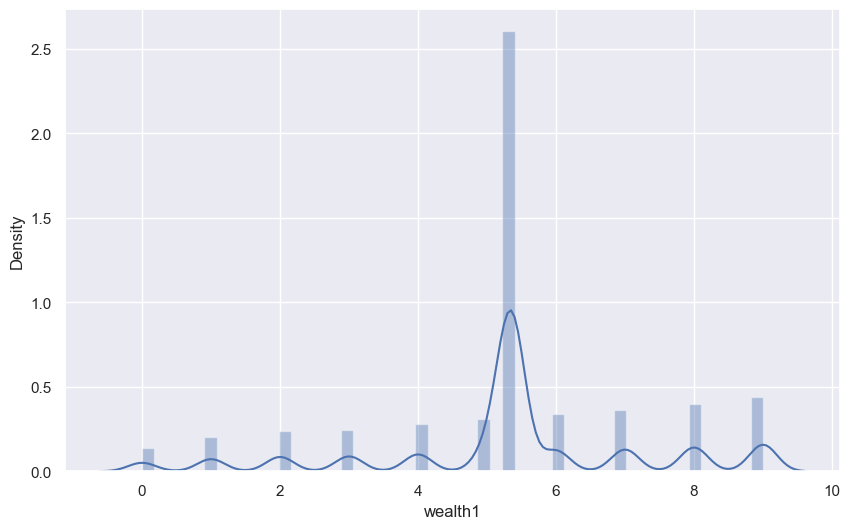

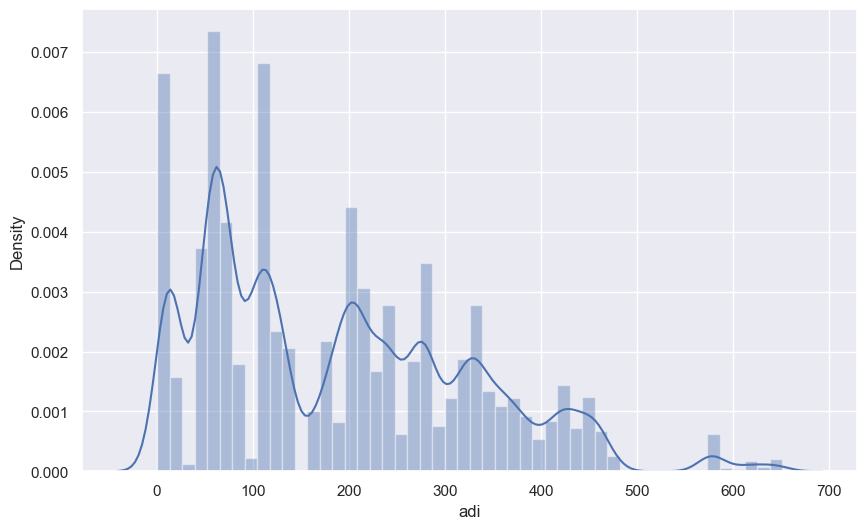

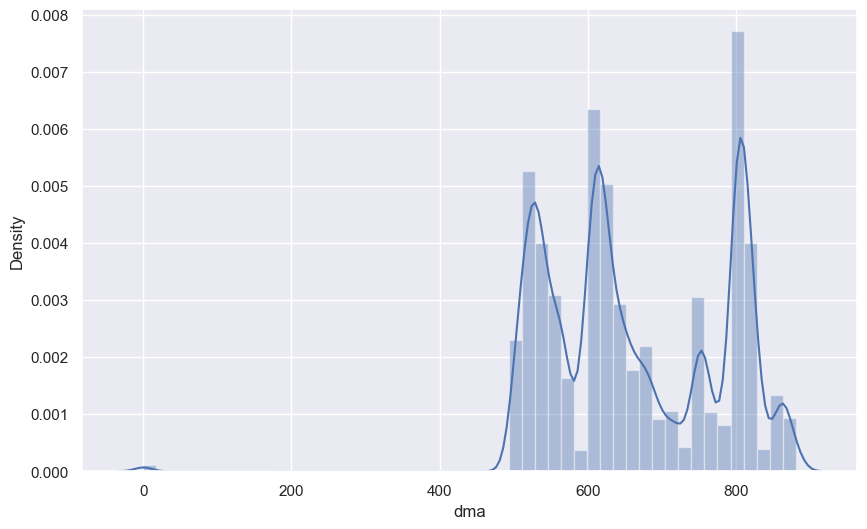

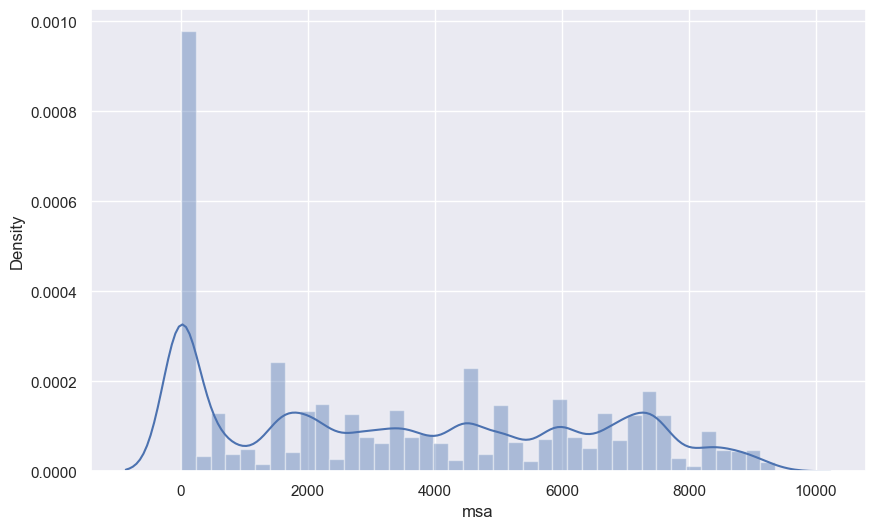

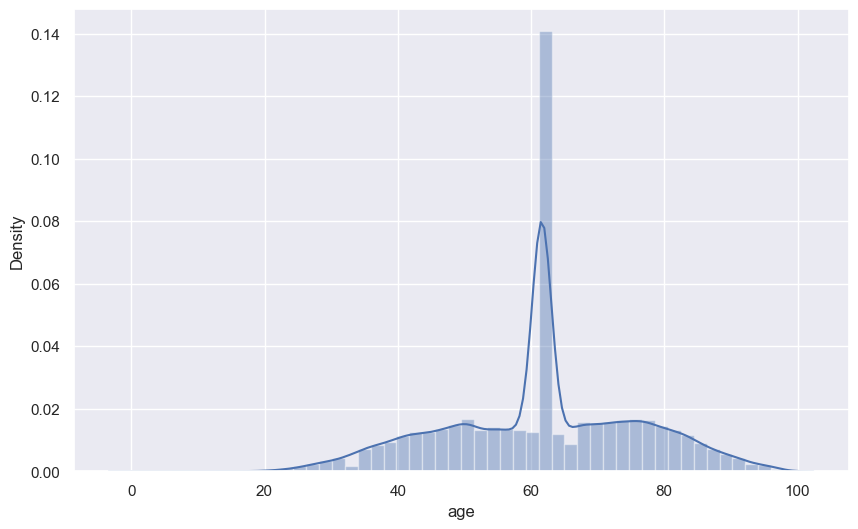

In [92]:
sns.distplot(data_num['wealth1'])
plt.show()

sns.distplot(data_num['adi'])
plt.show()

sns.distplot(data_num['dma'])
plt.show()

sns.distplot(data_num['msa'])
plt.show()

sns.distplot(data_num['age'])
plt.show()

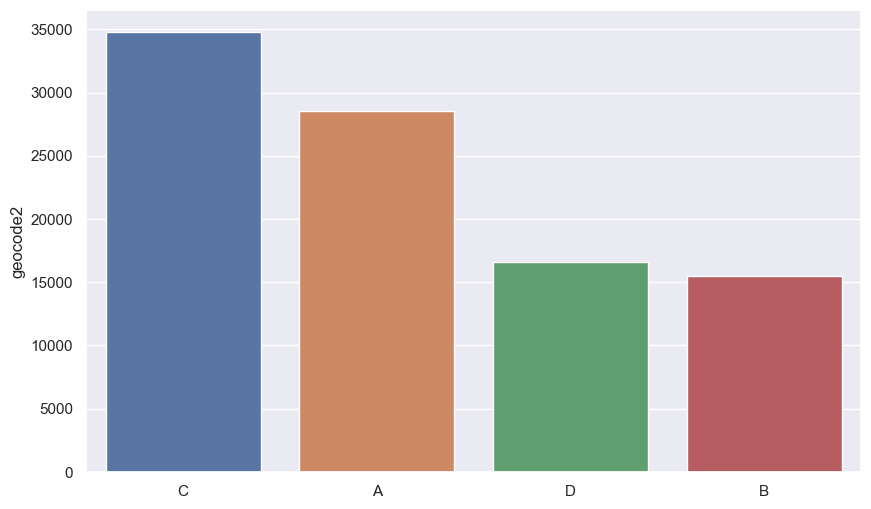

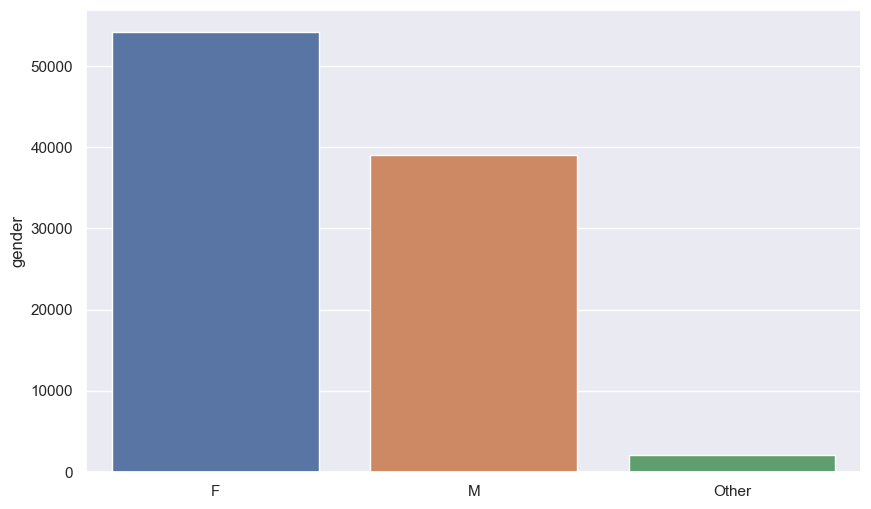

In [93]:
sns.barplot(x=data_cat['geocode2'].unique() , y=data_cat['geocode2'].value_counts() , data=data_cat)
plt.show()

sns.barplot(x=data_cat['gender'].unique() , y=data_cat['gender'].value_counts() , data=data_cat)
plt.show()